<a href="https://colab.research.google.com/github/t-cunningham99/PICSciE-Getting-Started-with-Machine-Learning-in-Python/blob/main/PICSciE_ClassicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###
#
# Load necessary packages
#
###
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

###
#
# Set the random seed
#
###

rng = np.random.RandomState(1)

###
#
# Set colors for plotting
#
###

# four color-blind friendly qualitative colors
qualitative_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a']

#Regression

## Load Some Example Data



In [2]:
from sklearn.datasets import load_diabetes

In [3]:
###
#
# Make the data set.
#
###

diabetes_bunch = load_diabetes()

diabetes_bunch.frame

diabetes_X = diabetes_bunch.data
diabetes_y = diabetes_bunch.target

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print(diabetes_X_train.shape, diabetes_X_test.shape)
print(diabetes_y_train.shape, diabetes_y_test.shape)

(422, 1) (20, 1)
(422,) (20,)


Text(0, 0.5, 'quantitative measure of diabetes progression')

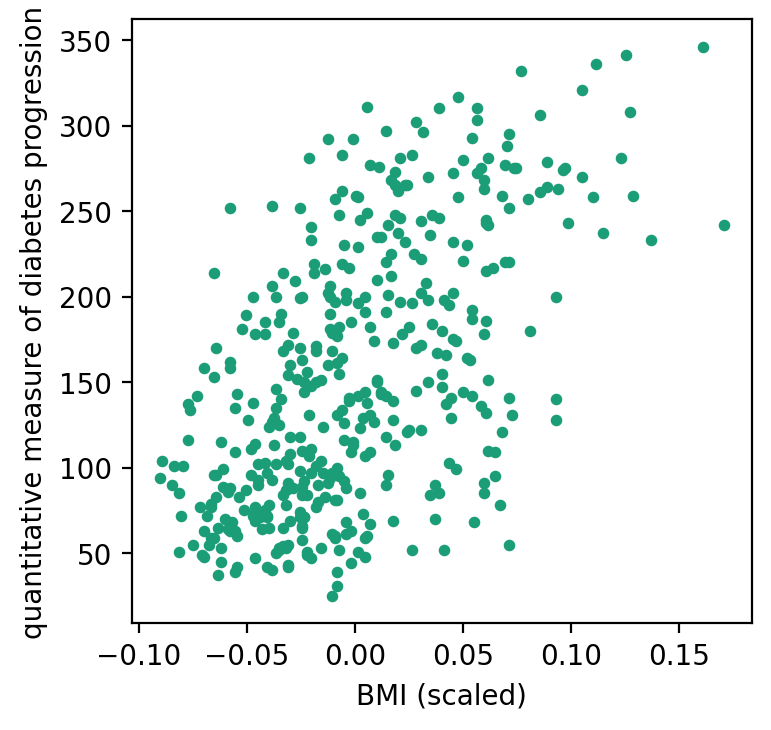

In [4]:
###
#
# Plot the data set.
#
###

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, color=qualitative_colors[0], s=10)
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')

## Linear Regression


#### A straight line with input $x$ and output $y$ has the form $y = w_1 x + w_0$, where $w_0$ and $w_1$ are coefficients we aim to learn. 

#### We use the letter $w$ because we think of the coefficients as **weights**; the value of $y$ is changed by changing the relative weight of one term or another.

#### The task of finding the function that best fits the training set of $n$ points in the $x$, $y$ plane is called **linear regression**.

#### To fit the line to the data, all we have to do is find the values of the weights ($w_0 , w_1$) that minimize the *loss*.

#### One way is to use the squared-error loss function:

## $ \mathrm{Loss} = \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2$ . 


In [5]:
def squarederror_loss(xs, ys, w0, w1):
  """Caculate the squared-error loss
    Parameters
    ----------
    xs : array_like
        x-axis values of data points, shape (number of data points)
    ys : array_like
        y-axis values of data points, shape (number of data points)
    w0 : array_like
        weight for intercept, shape (number of weights)
    w1 : array_like
        weight for slope, shape (number of weights)
    Returns
    -----------
    loss : array_like
        squared-error loss, shape (number of weights)
    """
  xs = np.asarray(xs).flatten()
  ys = np.asarray(ys).flatten()
  w0 = np.asarray(w0).flatten()
  w1 = np.asarray(w1).flatten()
  loss = np.sum((ys[:,np.newaxis] - (w1[np.newaxis,:]*xs[:,np.newaxis] + w0[np.newaxis,:]))**2.,axis=0) 
  return loss

#### The squared-error loss function is minimized when the partial derivates with respect to $ w_0 $ and $w_1 $ are zero:

## $ \frac{\partial}{\partial w_0} \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2 = 0 $, 

## $ \frac{\partial}{\partial w_1} \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2 = 0 $ .

#### This has unique soltions:

## $ w_0 = \frac{\sum y_j - w_1 (\sum x_j) }{N} $

## $ w_1 = \frac{N (\sum x_j y_j) - (\sum x_j)(\sum y_j)}{N(\sum x^2_j) - (\sum x_j)^2} $

In [6]:
def univariate_linear_regression(xs, ys):
  """Calculate optimal weights in the univariate linear regression case.
    Parameters
    ----------
    xs : array_like
        x-axis values of data points, shape (number of data points)
    ys : array_like
        y-axis values of data points, shape (number of data points)
    Returns
    -----------
    w0 : float
        weight for intercept
    w1 : float
        weight for slope
    """
  xs = np.asarray(xs).flatten()
  ys = np.asarray(ys).flatten()
  N = float(xs.shape[0])
  w1 = (N*np.sum(xs*ys) - np.sum(xs)*np.sum(ys) ) / ( N*np.sum(xs**2.) - np.sum(xs)**2.)
  w0 = (np.sum(ys) - w1*np.sum(xs)) / N
  return w0, w1

In [7]:
w0, w1 = univariate_linear_regression(diabetes_X_train, diabetes_y_train)
print(w0, w1)

152.91886182616116 938.2378612513518


In [8]:
print(squarederror_loss(diabetes_X_train, diabetes_y_train, w0, w1))

[1669018.37813539]


Text(0, 0.5, 'quantitative measure of diabetes progression')

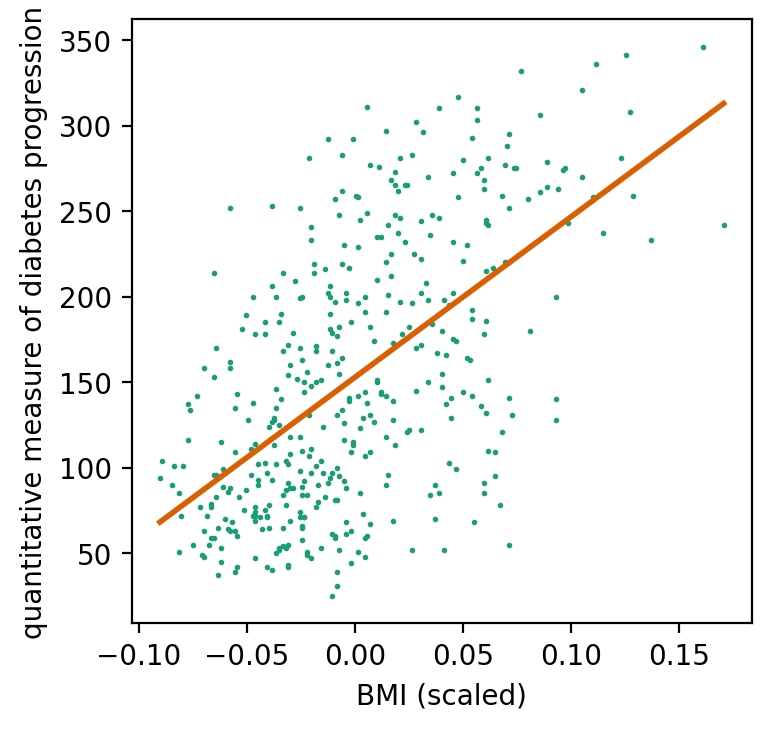

In [9]:
###
#
# Plot the data set with the best fit.
#
###

plot_xs = np.linspace(diabetes_X_train.min(), diabetes_X_train.max(), 101)

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, s=1, color=qualitative_colors[0])
axs.plot(plot_xs, w1*plot_xs + w0, color=qualitative_colors[1], linewidth=2)
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')

#### We don't have to just use this optimal weight value, we can explore the weight space.

#### We'll use the *squarederror_loss* function we defined earlier to calcule the loss over a wide range of $w_0$ and $w1$ values.

In [10]:
###
#
# Define a range of w0 and w1 values to calculate.
#
###

w0_min = w0-20.
w0_max = w0+20.
w1_min = w1-20.
w1_max = w1+20.

###
#
# Make a 200 x 200 grids of w0 and w1 values over that range.
#
###

XX, YY = np.mgrid[w0_min:w0_max:200j, w1_min:w1_max:200j]

###
#
# Flatten the grids to lists with 40000 values.
#
###

temp = np.c_[XX.ravel(), YY.ravel()]

In [11]:
###
#
# Calculate the squared-error loss for each pair of w0, w1 values.
#
###

Z = squarederror_loss(diabetes_X_train, diabetes_y_train, temp[:,0], temp[:,1])

###
#
# Turn the list of loss values into a 200 x 200 grid.
#
###
Z = Z.reshape(XX.shape)

###
#
# Also calculate the loss for the optimal w0, w1 values we found earlier.
#
###
best_fit_loss = squarederror_loss(diabetes_X_train, diabetes_y_train, np.array([w0]), np.array([w1]))

[1669018.37813539]


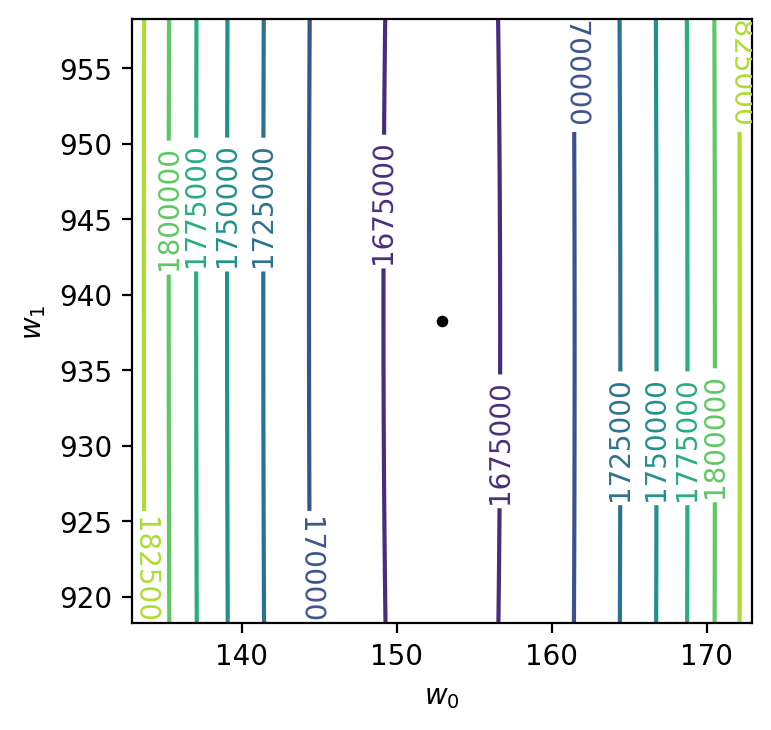

In [12]:
###
#
# Plot the squared-error loss values.
#
###

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200, sharex=True)
CS = axs.contour(XX, YY, Z)
axs.clabel(CS, inline=True, fontsize=10, fmt='%d')
axs.scatter(w0, w1, s=10, color='k')
axs.set_ylabel(r'$w_1$')
axs.set_xlabel(r'$w_0$')

print(best_fit_loss)

#### This is an ideal case, where it is easy to find an optimal solution where the partial derivates are zero.

#### What are other methods for minimizing loss that does not depend  on solving partial derivates and can be applied to any loss function?

#### We can search through a continuous weight space looking for the minimum, using a technique called *gradient decent*.

## Gradient Decent

### Step 0

#### Choose a starting point in the weight space - a point in the ($w_0$, $w_1$).
#### A simple method to do this is to randomly choose a point, but this could be very far from the optimal position.

#### Usually you'll have some intuition about your data and will choose several values close to what you expect and rerun the procedure to see if you get the same answer.

In [13]:
w0_init, w1_init = w0-10., w1-10.

### Step 1

#### Compute an estimate of the gradient at this point.

#### For the univariate case:

## $ \frac{\partial}{\partial w_0} \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2 = -2 \sum_{j=1}^{n}(y_j - (w_1 x_j + w_0)) $, 

## $ \frac{\partial}{\partial w_1} \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2 = -2 \sum_{j=1}^{n}(y_j - (w_1 x_j + w_0)) x_j $ .


In [14]:
def gradient_of_weights(xs, ys, w0, w1):
  """Calculate the partial derivative of the loss function with respect to the weights.
  Parameters
  ----------
  xs : array_like
      x-axis values of data points, shape (number of data points)
  ys : array_like
      y-axis values of data points, shape (number of data points)
  w0 : float
    weight for intercept
  w1 : float
      weight for slope
  Returns
  -----------
  derivative_w0 : float
      partial derivative of the loss function with respect to theweight for slope
  derivative_w1 : float
      partial derivative of the loss function with respect to the weight for slope
  """

  derivative_w0 = np.sum((ys - (w1*xs + w0)) )
  derivative_w1 = np.sum((ys - (w1_init*xs + w0_init))*xs)

  return derivative_w0, derivative_w1

### Step 2

#### Move a small amount from the initial value in the steepest downhill direction.

#### We specfic the *small amount* to move as $\alpha$. This is often called the *learning rate* or *step size*.

#### The initial $w_0$ and $w_1$ are updated in the following way:

## $ w_0 ← w_0 + \alpha \sum_{j=1}^{n}(y_j - (w_1 x_j + w_0)) $, 

## $ w_1 ← w_1 + \alpha \sum_{j=1}^{n}(y_j - (w_1 x_j + w_0)) x_j $ .

In [15]:
def update_weights(xs, ys, w0_old, w1_old, step_size):
  """ Update the weights using the partial derivate and step size.
  Parameters
  ----------
  xs : array_like
      x-axis values of data points, shape (number of data points)
  ys : array_like
      y-axis values of data points, shape (number of data points)
  w0_old : float
    weight for intercept
  w1_old : float
      weight for slope
  Returns
  -----------
  w0_new: float
    weight for intercept
  w1_new : float
    weight for slope
  """
  xs = np.asarray(xs).flatten()
  ys = np.asarray(ys).flatten()
  w0_new = w0_old + step_size*np.sum((ys - (w1_old*xs + w0_old)) )
  w1_new = w1_old + step_size*np.sum((ys - (w1_old*xs + w0_old))*xs)
  return w0_new, w1_new

### Repeat Steps 1 - 2

### until difference between the old and the new weights is sufficiently small.

In [16]:
def univariate_gradient_decent(xs, ys, w0_init, w1_init, step_size = 0.001, sufficiently_small = 0.00001):
  """ Update the weights using the partial derivate and step size.
  Parameters
  ----------
  xs : array_like
      x-axis values of data points, shape (number of data points)
  ys : array_like
      y-axis values of data points, shape (number of data points)
  w0_init : float
    initial guess of weight for intercept
  w1_init : float
    initial guess of weight for slope
  Returns
  -----------
  w0s: array_like
    list of weights for intercept
  w1s : array_like
    list of weights for slope
  """
  w0_firststep, w1_firststep = update_weights(xs, ys, w0_init, w1_init, step_size)
  
  w0s = np.array( [w0_init, w0_firststep] )
  w1s = np.array( [w1_init, w1_firststep] )
  
  while np.any([np.abs(w0s[-2]-w0s[-1]) > sufficiently_small, np.abs(w1s[-2]-w1s[-1]) > sufficiently_small]):
    w0_nextstep, w1_nextstep = update_weights(xs, ys, w0s[-1], w1s[-1], step_size)
    w0s = np.append(w0s, w0_nextstep)
    w1s = np.append(w1s, w1_nextstep)
  return w0s, w1s

In [17]:
print(w0, w1)
print(w0_init, w1_init)
print(update_weights(diabetes_X_train, diabetes_y_train, w0_init, w1_init, step_size = 0.001))

152.91886182616116 938.2378612513518
142.91886182616116 928.2378612513518
(147.14085748544002, 928.2494146922324)


In [18]:
weights_to_plot0, weights_to_plot1 = univariate_gradient_decent(diabetes_X_train, diabetes_y_train, w0_init, w1_init)
print(weights_to_plot0)
print(weights_to_plot1)

[142.91886183 147.14085749 149.58116867 ... 152.91886679 152.91886678
 152.91886678]
[928.23786125 928.24941469 928.26011452 ... 938.22739033 938.22740034
 938.22741034]


(918.2378612513518, 958.2378612513518)

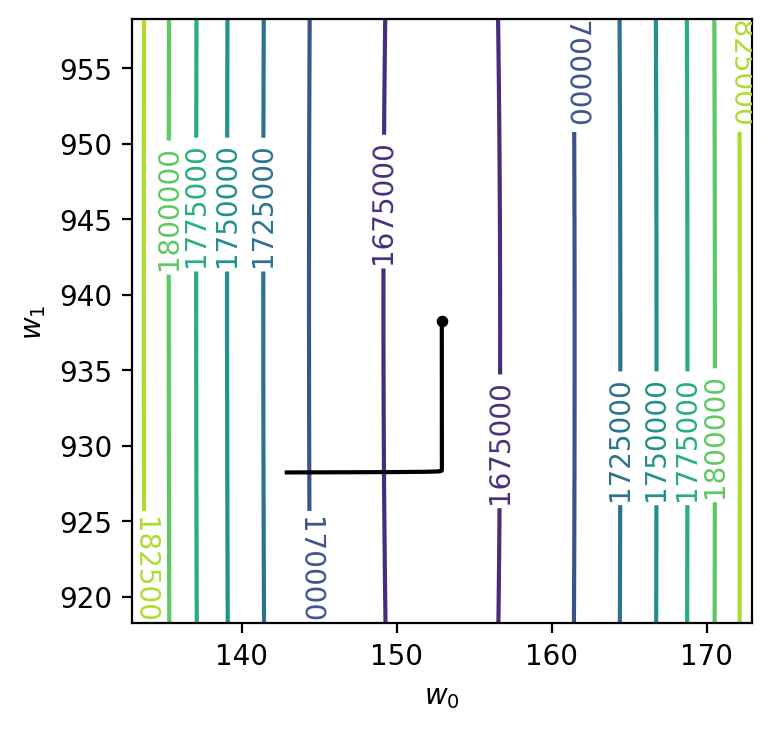

In [19]:
###
#
# Plot the squared-error loss values.
#
###

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200, sharex=True)
CS = axs.contour(XX, YY, Z)
axs.clabel(CS, inline=True, fontsize=10, fmt='%d')
axs.plot(weights_to_plot0, weights_to_plot1, '-', color='k')
axs.scatter(w0, w1, s=10, color='k')
axs.set_ylabel(r'$w_1$')
axs.set_xlabel(r'$w_0$')
axs.set_xlim(w0-20., w0+20.)
axs.set_ylim(w1-20., w1+20.)

## Regression with Sci-Kit Learn

In [20]:
from sklearn import linear_model

### Start with the same very simple example. 

In [21]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(diabetes_X_train, diabetes_y_train)
print(linear_reg.coef_)
print(linear_reg.intercept_)

[938.23786125]
152.91886182616113


### What if we want to fit a more complex model, such as a polynomial?

### With input $x$ and output $y$ has the form $y = w_0 + w_1 x  + w_2 x^2$, where $w_0$, $w_1$, and $w_2$ are coefficients we aim to learn. 



In [22]:
diabetes_X_polynomial_train = np.hstack([diabetes_X_train, np.power(diabetes_X_train,2)])
print(diabetes_X_polynomial_train.shape)

(422, 2)


In [23]:
poly_reg = linear_model.LinearRegression()
poly_reg.fit(diabetes_X_polynomial_train, diabetes_y_train)
print(poly_reg.coef_)
print(poly_reg.intercept_)

[935.32292342  99.66616842]
152.69450868678655


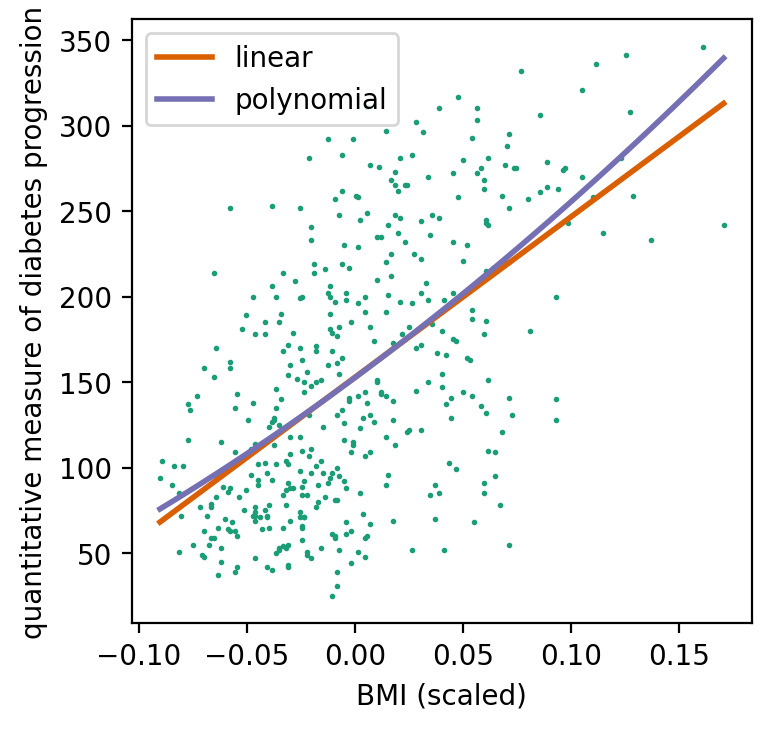

In [24]:
###
#
# Plot the data set with the best fit.
#
###

plot_xs = np.linspace(diabetes_X_train.min(), diabetes_X_train.max(), 101)

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, s=1, color=qualitative_colors[0])
axs.plot(plot_xs, linear_reg.intercept_ + linear_reg.coef_[0]*plot_xs, color=qualitative_colors[1], linewidth=2, label='linear')
axs.plot(plot_xs, poly_reg.intercept_ + poly_reg.coef_[0]*plot_xs + poly_reg.coef_[0]*np.power(plot_xs,2), color=qualitative_colors[2], linewidth=2, label='polynomial')
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')
axs.legend()

### What if we want to fit data in more than two dimensions?

In [25]:
# Load the full diabetes dataset
diabetes_dataset = load_diabetes(as_frame=True)

In [26]:
#sns.pairplot(diabetes_dataset.frame, corner=True)

In [27]:
features = diabetes_dataset.data
print(features.columns)
features = features.drop(columns=['sex'])
print(features.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [28]:
reg = linear_model.LinearRegression()
reg.fit(features, diabetes_dataset.target)
print(reg.coef_)
print(reg.intercept_)
print(features.shape, len(reg.coef_))

[ -33.17655557  557.06057374  276.08163793 -712.80368975  420.56485548
  139.51079371  126.28020632  756.36625515   48.91841452]
152.133484162896
(442, 9) 9


# Classification

## Load Some Example Data

In [29]:
from sklearn.datasets import make_classification

In [30]:
###
#
# Make the data set.
#
###

X, labels = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1, class_sep=3.)
X += 2 * rng.uniform(size=X.shape)

Text(0, 0.5, '$x_2$')

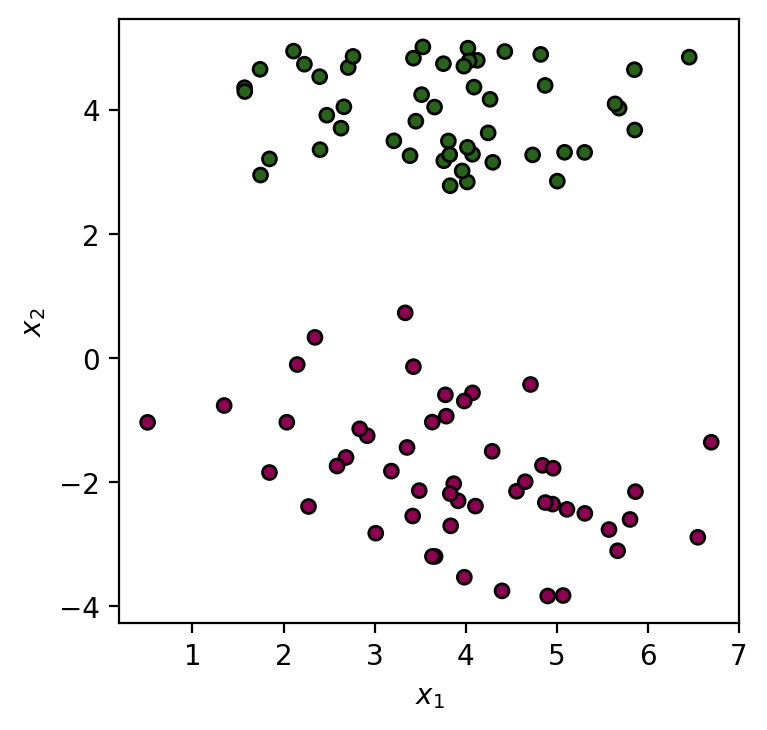

In [31]:
###
#
# Plot the data set.
#
###

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k", cmap='PiYG')
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

## Decision Boundary


#### A *decision boundary* is a line (or a surface in more than two dimensions) that seperates two classes.
#### Linearly seperable data can be divided using a linear decision boundary:

## $ x_2 - (w_1 x_1 + w_0) = 0 $

#### The yellow points, which we want to classify with value 1, are above this line; they are points for which:
## $ x_2 - (w_1 x_1 + w_0) > 0 $,
#### while the purple points, which we want to classify with value 0, are 
## $ x_2 - (w_1 x_1 + w_0) < 0 $.

Text(0, 0.5, '$x_2$')

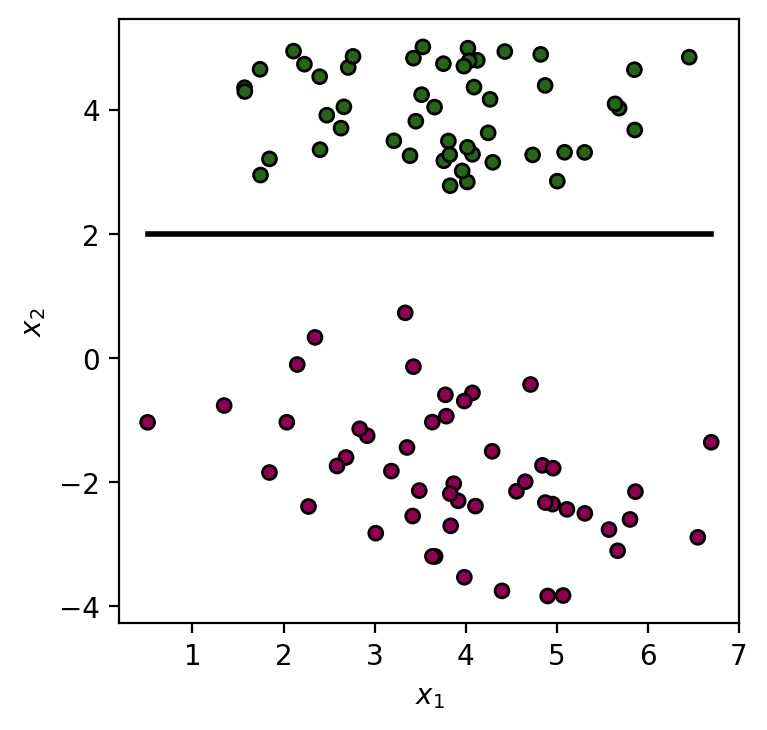

In [32]:
###
#
# Plot the data set and inital decision boundary guess.
#
###

plot_xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 101)

w0_init, w1_init = 2., 0.

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k", cmap='PiYG')
axs.plot(plot_xs, w1_init*plot_xs + w0_init, color='k', linewidth=2)
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

#### Define a function that predicts the class based on the point's position relative to the decision boundary.

In [33]:
def predict_class(x1s, x2s, w0, w1):
  """ Predict the class of each point.
  Parameters
  ----------
  x1s : array_like
      x-axis values of data points, shape (number of data points)
  x2s : array_like
      y-axis values of data points, shape (number of data points)
  w0 : float
    weight for intercept
  w1 : float
    weight for slope
  Returns
  -----------
  prediction: array_like
    list of predicted classes
  """
  prediction = np.asarray((x2s - (w1*x1s + w0)) > 0, dtype=int)
  return prediction

In [34]:
predictions = predict_class(X[:, 0], X[:, 1], w0_init, w1_init)
print(predictions)
print(predictions == labels)
print(np.sum(predictions == labels), labels.shape[0])

[1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
100 100


### Update the weights based on the points that miscalssified:

In [ ]:
def update_weights_classification(x1s, x2s, w0_old, w1_old, labels, step_size):
  """ Update the weights based on the predicted classes.
  Parameters
  ----------
  x1s : array_like
      x-axis values of data points, shape (number of data points)
  x2s : array_like
      y-axis values of data points, shape (number of data points)
  w0_old : float
    weight for intercept
  w1_old : float
    weight for slope
  labels : array_like
    true classes
  step_size : float
  Returns
  -----------
  w0_new: float
    weight for intercept
  w1_new : float
    weight for slope
  """
  predictions = predict_class(x1s, x2s, w0_old, w1_old)
  if np.sum(predictions == labels) == labels.shape[0]:
    # weights are unchanged
    return w0_old, w1_old
  else:
    if np.sum((labels == 1) & (predictions == 0)) > 0:
      # if true class is yellow and predicted to be purple
      w0_new = w0_old - step_size # decrease intercept of decision boundary
      if np.sum((labels == 1) & (predictions == 0) & (x1s > 0.)) > 0:
        # if incorrectly classifed points are on right side
        w1_new = w1_old - step_size # decrease slope of decision boundary
      else:
        # if incorrectly classifed points are on left side
        w1_new = w1_old + step_size # increase slope of decision boundary
    
    if np.sum((labels == 0) & (predictions == 1)) > 0:
      # if true class is purple and predicted to be yellow
      w0_new = w0_old + step_size # increase intercept of decision boundary
      if np.sum((labels == 0) & (predictions == 1) & (x1s > 0.)) > 0:
        # if incorrectly classifed points are on right side
        w1_new = w1_old + step_size # increase slope of decision boundary
      else:
        # if incorrectly classifed points are on left side
        w1_new = w1_old - step_size # decrease slope of decision boundary
  
    return w0_new, w1_new

In [ ]:
w0_init, w1_init = 4.0, 0.0
print(w0_init, w1_init)
w0_new, w1_new = update_weights_classification(X[:, 0], X[:, 1], w0_init, w1_init, labels, step_size = 0.001)
print(w0_new, w1_new)

### Similar to regression, we can iteratively update the weights until we have optimized the decision boundary:

In [ ]:
def optimize_classification_boundary(x1s, x2s, labels, w0_init, w1_init, step_size = 0.001, sufficiently_small=0.00001):
  """ Update the weights using the partial derivate and step size.
  Parameters
  ----------
  x1s : array_like
      x-axis values of data points, shape (number of data points)
  x2s : array_like
      y-axis values of data points, shape (number of data points)
  w0_init : float
    initial guess of weight for intercept
  w1_init : float
    initial guess of weight for slope
  Returns
  -----------
  w0s: array_like
    list of weights for intercept
  w1s : array_like
    list of weights for slope
  """
  w0_firststep, w1_firststep = update_weights_classification(x1s, x2s, w0_init, w1_init, labels, step_size)
  
  w0s = np.array( [w0_init, w0_firststep] )
  w1s = np.array( [w1_init, w1_firststep] )
  
  while np.any([np.abs(w0s[-2]-w0s[-1]) > sufficiently_small, np.abs(w1s[-2]-w1s[-1]) > sufficiently_small]):
    w0_nextstep, w1_nextstep = update_weights_classification(x1s, x2s, w0s[-1], w1s[-1], labels, step_size)
    w0s = np.append(w0s, w0_nextstep)
    w1s = np.append(w1s, w1_nextstep)
  return w0s, w1s

In [ ]:
w0s, w1s = optimize_classification_boundary(X[:, 0], X[:, 1], labels, 4.0, 0.0)

In [ ]:
###
#
# Plot the data set, inital decision boundary guess, and final decision boundary.
#
###

plot_xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 101)

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k", cmap='PiYG')
axs.plot(plot_xs, w1s[0]*plot_xs + w0s[0], color='k', linewidth=2)
axs.plot(plot_xs, w1s[-1]*plot_xs + w0s[-1], color=qualitative_colors[2], linewidth=2)
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

## Classification with Sci-Kit Learn

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC()
clf.fit(X, labels)
print(clf.coef_)
print(clf.intercept_)

decision_function = clf.decision_function(X)

In [ ]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=50, linewidth=1, edgecolors="none", cmap='PiYG')
axs.scatter(X[:, 0], X[:, 1], marker="o", c=decision_function, s=25, edgecolors="none", cmap='PiYG', vmin=-1*np.max(np.abs(decision_function)), vmax=np.max(np.abs(decision_function)))
axs.plot(plot_xs, (-(plot_xs * clf.coef_[0, 0]) - clf.intercept_[0]) / clf.coef_[0, 1], color='k', linewidth=2)
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

In [ ]:
###
#
# Make the data set.
#
###

X, labels = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1, class_sep=1.5)
X += 2 * rng.uniform(size=X.shape)

In [ ]:
###
#
# Plot the data set.
#
###

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=15, cmap='PiYG')
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

In [ ]:
clf = LinearSVC(C=100.)
clf.fit(X, labels)
print(clf.coef_)
print(clf.intercept_)

decision_function = clf.decision_function(X)

In [ ]:
###
#
# Plot the data set and decision boundary.
#
###

plot_xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 101)

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=50, linewidth=1, edgecolors="none", cmap='PiYG')
axs.scatter(X[:, 0], X[:, 1], marker="o", c=decision_function, s=25, edgecolors="none", cmap='PiYG', vmin=-1*np.max(np.abs(decision_function)), vmax=np.max(np.abs(decision_function)))
axs.plot(plot_xs, (-(plot_xs * clf.coef_[0, 0]) - clf.intercept_[0]) / clf.coef_[0, 1], color='k', linewidth=2)
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')